##HW2 Ex. 1

Data input

In [69]:
import numpy as np
import pandas as pd

initial_price = 60
b = 40
q = 10
r = 0.05
u = 1.4
d = 1 / u
years = 10
num_of_sim = 1000

**a)** We calculate a risk-neutral probability

In [70]:
p = (1 + r - d) / (u - d)
p

0.4895833333333334

We use the following formula to generate the price. X is a random variable that we get from rand() function.

$P_{t+1} = \begin{cases} u \cdot P_t & \text{if } X \leq p \\ d \cdot P_t &\text{if } X > p \end{cases} $

In [71]:
price_paths = np.zeros((years + 1, num_of_sim))
price_paths[0] = initial_price

for t in range(1, years + 1):
    random_values = np.random.rand(num_of_sim)
    price_paths[t] = np.where(random_values <= p, price_paths[t - 1] * u, price_paths[t - 1] * d)
price_paths

array([[ 60.        ,  60.        ,  60.        , ...,  60.        ,
         60.        ,  60.        ],
       [ 42.85714286,  84.        ,  42.85714286, ...,  42.85714286,
         84.        ,  42.85714286],
       [ 30.6122449 , 117.6       ,  60.        , ...,  60.        ,
        117.6       ,  30.6122449 ],
       ...,
       [117.6       , 117.6       ,  60.        , ...,  60.        ,
        117.6       ,  30.6122449 ],
       [164.64      ,  84.        ,  84.        , ...,  42.85714286,
        164.64      ,  42.85714286],
       [117.6       ,  60.        ,  60.        , ...,  60.        ,
        117.6       ,  60.        ]])

Calculate cashflows and get the answer for **b)**

In [72]:
cash_flows = np.zeros((years+1, num_of_sim))
cash_flows[0] = (initial_price-b)*q
for t in range(1, years+1):
    cash_flows[t] = (price_paths[t] - b) * q / (1 + r) ** t
cash_flows

array([[200.        , 200.        , 200.        , ..., 200.        ,
        200.        , 200.        ],
       [ 27.21088435, 419.04761905,  27.21088435, ...,  27.21088435,
        419.04761905,  27.21088435],
       [-85.14970614, 703.85487528, 181.40589569, ..., 181.40589569,
        703.85487528, -85.14970614],
       ...,
       [525.22734493, 525.22734493, 135.36787241, ..., 135.36787241,
        525.22734493, -63.54002174],
       [803.44055317, 283.62792314, 283.62792314, ...,  18.41739761,
        803.44055317,  18.41739761],
       [476.39668475, 122.78265071, 122.78265071, ..., 122.78265071,
        476.39668475, 122.78265071]])

In [73]:
PV_of_cashflows_b = np.mean(np.sum(cash_flows, axis=0))
print(f"Expected Present Value of Cash Flows: ${PV_of_cashflows_b:.2f}")

Expected Present Value of Cash Flows: $3030.57


**c)** Now we add np.maximum function to add flexibility.

In [74]:
cash_flows = np.zeros((years+1, num_of_sim))
cash_flows[0] = (initial_price-b)*q
for t in range(1, years+1):
    cash_flows[t] = np.maximum((price_paths[t] - b) * q / (1 + r) ** t, 0)


PV_of_cashflows_c = np.mean(np.sum(cash_flows, axis=0))
print(f"Expected Present Value of Cash Flows: ${PV_of_cashflows_c:.2f}")

Expected Present Value of Cash Flows: $3336.94


Out expected cashflows became bigger than in the b) part which is to be expected as now we eliminate all possible negative outcomes so out cashflows are either 0 or positive.

**d)** Now we change the q parametr to calculate how our cashflows will change in response to investment

In [75]:
q = 20

In [78]:
cash_flows = np.zeros((years+1, num_of_sim))
cash_flows[0] = (initial_price-b)*q
for t in range(1, years+1):
    cash_flows[t] = np.maximum((price_paths[t] - b) * q / (1 + r) ** t, 0)


PV_of_cashflows_d = np.mean(np.sum(cash_flows, axis=0))
print(f"Expected Present Value of Cash Flows: ${PV_of_cashflows_d:.2f}")

Expected Present Value of Cash Flows: $6673.87


It's worthwile to do the expansion if cashflows in case of investment (including the negative I) are higher than CF's in c)

-I + PV_of_cashflows_d >= PV_of_cashflows_c

I <=  PV_of_cashflows_d - PV_of_cashflows_c

In [79]:
print("I should be smaller than", round(PV_of_cashflows_d - PV_of_cashflows_c))

I should be smaller than 3337


e) Let's look at the scenario where we expand in year 1

In [80]:
cash_flows = np.zeros((years+1, num_of_sim))
q=10
cash_flows[0] = (initial_price-b)*q
q=20
for t in range(1, years+1):
    cash_flows[t] = np.maximum((price_paths[t] - b) * q / (1 + r) ** t, 0)


PV_of_cashflows_e = np.mean(np.sum(cash_flows, axis=0))
print(f"Expected Present Value of Cash Flows: ${PV_of_cashflows_e:.2f}")

Expected Present Value of Cash Flows: $6473.87


Let's look at the scenario where we expand in year 2

In [82]:
cash_flows = np.zeros((years+1, num_of_sim))
q=10
cash_flows[0] = (initial_price-b)*q
for t in range(1, years+1):
    if t == 2:
      q = 20
    cash_flows[t] = np.maximum((price_paths[t] - b) * q / (1 + r) ** t, 0)


PV_of_cashflows_e2 = np.mean(np.sum(cash_flows, axis=0))
print(f"Expected Present Value of Cash Flows: ${PV_of_cashflows_e2:.2f}")

Expected Present Value of Cash Flows: $6250.35


It is evident that we should either not invest at all (if I is bigger than 3337) or invest in t = 0 (if I < 3337).

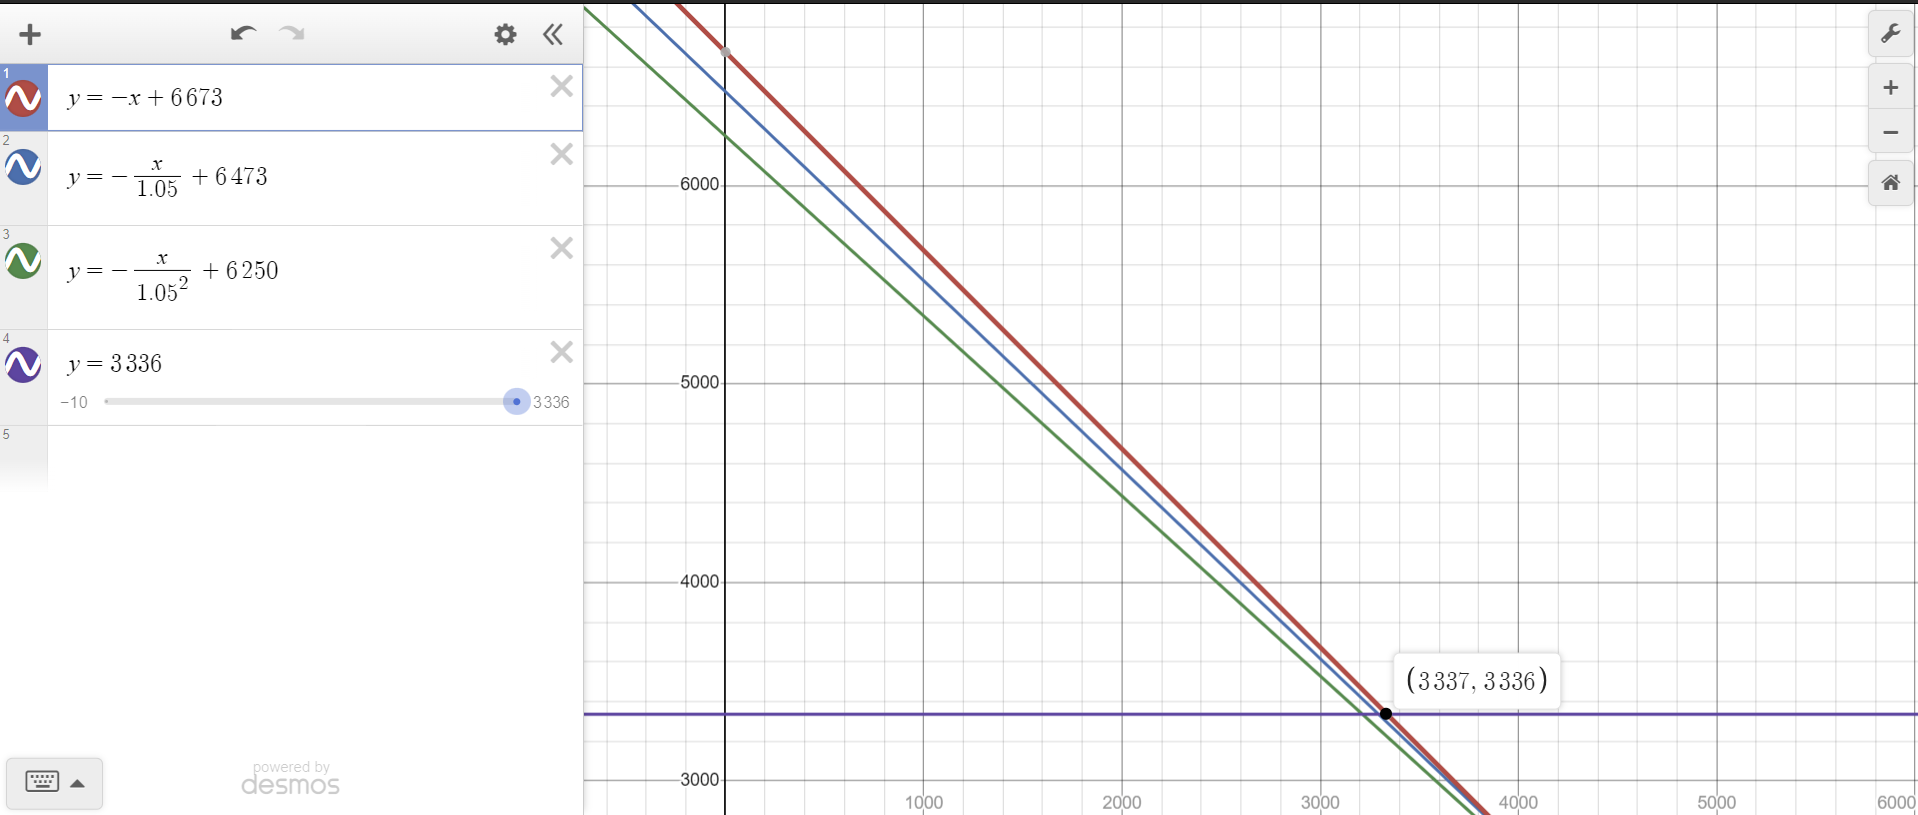